# Linear regression

In [ ]:
# Importing the required libraries for computation and visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Obtain the data for linear regression

x_train = np.load('x_train_simple.npy') # feature values
y_train = np.load('y_train_simple.npy') # target values

In [ ]:
# Create model object and train it with the fit() method

lin_reg = LinearRegression()
p = lin_reg.fit(x_train, y_train)

alpha = p.coef_ # Alpha parameter of the line fitted to the data
beta = p.intercept_ # Beta parameter of the line fitted to the data

print(alpha, beta)

[[0.4903973]] [-0.00724806]


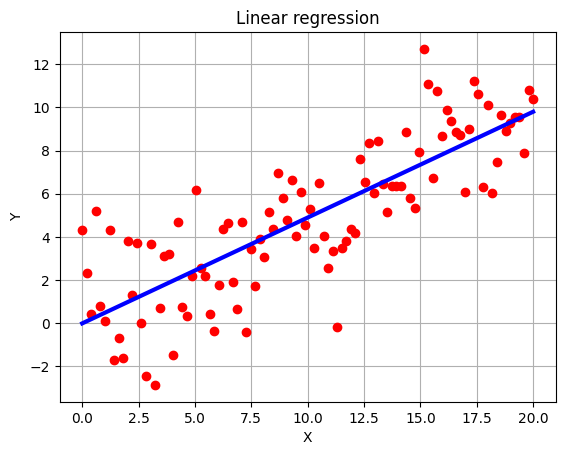

In [ ]:
# Plot the data as a scatter-plot with the resulting line on it

# markers: https://matplotlib.org/stable/api/markers_api.html
# colors: https://matplotlib.org/stable/users/explain/colors/colors.html
# line styles: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

plt.figure()

# scatter plot
plt.plot(x_train, y_train, 'ro', markersize=6)

# line
plt.plot(x_train, (alpha*x_train+beta), 'b', linestyle='solid', linewidth=3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear regression')

plt.grid()
plt.show()

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Obtain the data for logistic regression

x_train = np.load('x_train_logistic.npy')
y_train = np.load('y_train_logistic.npy').ravel() # ravel() is for having a flat, 1D set

In [ ]:
# Create model object and train it with the fit() method

log_reg = LogisticRegression()
p = log_reg.fit(x_train, y_train)

alpha = p.coef_
beta = p.intercept_

print(alpha, beta)

[[1.90936581]] [-1.96846381]


In [ ]:
# In the case of linear regression, it was easy to plot a line
# For logistic regression let us define this curve prior to plotting

def model(x):
    return (1 / (1 + np.exp(-x)))

In [ ]:
# Define the data points for the estimated curve so we can plot them as a continuous curve
# x-coordinates of the curve
x = np.linspace(0.1, 2.05, 300)

# y-coordinates for the curve (OBSERVE that the same convention is used by the algorithm to obtain parameters of the log curve as for linreg)
est = model(alpha*x+beta).ravel()

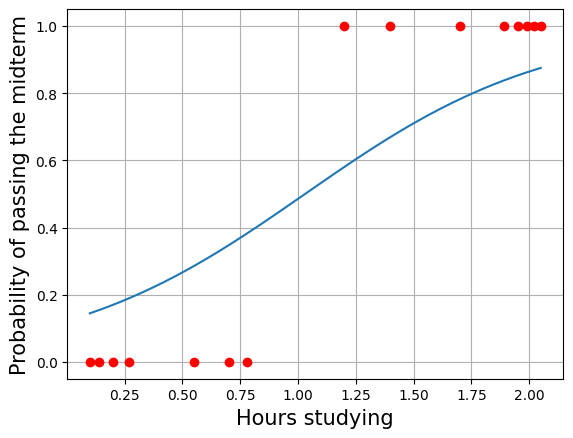

In [ ]:
# Plot the data as a scatter-plot with the resulting curve on it

plt.figure()

# scatter-plot
plt.plot(x_train, y_train, 'ro')

# curve plot
plt.plot(x, est)
plt.xlabel('Hours studying', fontsize=15)
plt.ylabel('Probability of passing the midterm', fontsize=15)
plt.grid()
plt.show()

## Visualization 2: decision boundary

In [ ]:
# load data

x_train = np.load('x_train_log_02.npy')
y_train = np.load('y_train_log_02.npy')

In [ ]:
def plot_decision_boundary(pred_func):

    x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
    y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5

    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = pred_func(np.c_[xx.ravel(), yy.ravel()])

    zz = zz.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.ravel(), cmap=plt.cm.Spectral)

In [ ]:
log_reg = LogisticRegression()
p = log_reg.fit(x_train, y_train.ravel())

alpha = p.coef_
beta = p.intercept_

print(alpha, beta)

[[ 0.98507379 -1.07131631]] [5.81546455]


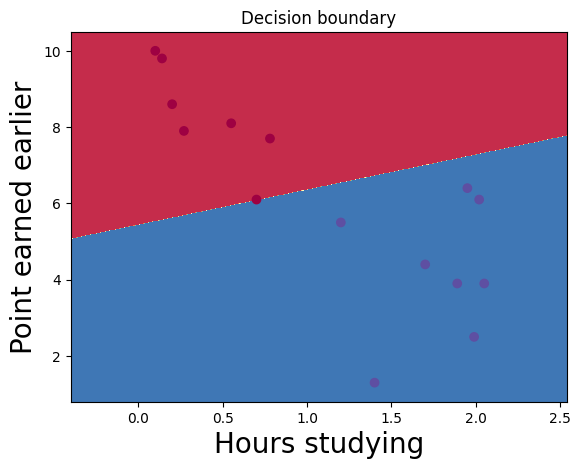

In [ ]:
plot_decision_boundary(lambda x: p.predict(x))

plt.xlabel('Hours studying', fontsize=20)
plt.ylabel('Point earned earlier', fontsize=20)
plt.title('Decision boundary')
plt.show()